Before using running the notebook, you need to run the following commands on the terminal:
<br><br>git clone https://github.com/Rakshith-Manandi/text-to-image-using-GAN
<br>cd text-to-image-using-GAN

In [23]:
from trainer_demo import Trainer     #trainer.ipynb file
import argparse
from PIL import Image
import os   
import easydict

In [24]:
models = {
    0 : 'flowers',
    1 : 'flowers_cls',
    2 : 'birds',
    3 : 'birds_cls',
}

Making predictions on 5 test samples for:
<br><br>i=0: flowers, using the GAN based model
<br>i=1: flowers, using the GAN-CLS based model
<br>i=2: birds, using the GAN based model
<br>i=3: birds, using the GAN-CLS based model
<br><br>The results will be stored in 'results_demo' directory

In [25]:
if not os.path.exists('results_demo/original_images'):
    os.makedirs('results_demo/original_images')

In [26]:
import math

In [34]:
for i in range(4):
    args = easydict.EasyDict({
                                'type': 'gan', 
                                'lr': 0.0002,
                                'l1_coef': 50,
                                'l2_coef': 100,
                                'cls': bool(i%2),
                                'save_path': models[i],
#                                'inference': True,
                                'pre_trained_disc': 'checkpoints/{0}/disc_190.pth'.format(models[i]),
                                'pre_trained_gen': 'checkpoints/{0}/gen_190.pth'.format(models[i]),
                                'dataset': models[math.floor(i/2)*2],
                                'split': 2,
                                'batch_size': 64,
                                'num_workers': 8,
                                'epochs':1})

    trainer = Trainer(type=args.type,
                      dataset=args.dataset,
                      split=args.split,
                      lr=args.lr,
                      save_path=args.save_path,
                      l1_coef=args.l1_coef,
                      l2_coef=args.l2_coef,
                      pre_trained_disc=args.pre_trained_disc,
                      pre_trained_gen=args.pre_trained_gen,
                      batch_size=args.batch_size,
                      num_workers=args.num_workers,
                      epochs=args.epochs
                      )

#     if not args.inference:
#         trainer.train(args.cls)
#     else:
    #trainer.train(bool(i%2))
    trainer.predict()

/home/uburoxana/.local/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/home/uburoxana/.local/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/home/uburoxana/.local/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/home/uburoxana/.local/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/home/uburoxana/.local/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use datas

Displaying the results for Flowers:

In [35]:
%run demo_text.py

<Figure size 432x288 with 0 Axes>

caption:
this flower has a large number of light pink petals that have irregular edges.


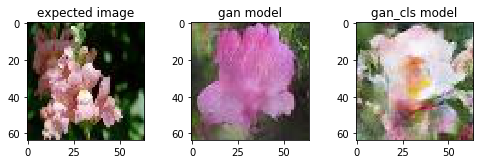

caption:
the flower has soft petals that are white and yellow in color.


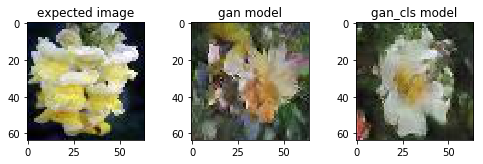

caption:
this flower has large and wide petals in a shade of brilliant red.


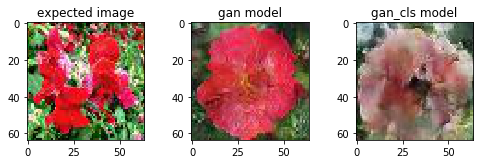

caption:
this flower has very smooth, rounded blossoms of pale yellow petals.


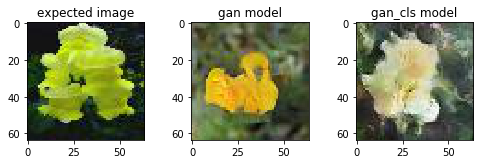

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(4):
    
#    name = flowers_samples[i]['txt'].replace("/", "").replace("\n", "").replace(" ", "_")[:100]
    name = flowers_samples[i]
    im1 = plt.imread('results_demo/original_images/{0}.jpg'.format(name))
    im2 = plt.imread('results_demo/{0}/{1}.jpg'.format(models[0], name))
    im3 = plt.imread('results_demo/{0}/{1}.jpg'.format(models[1], name))

    print( 'caption:'), print(flowers_samples[i].replace('_',' ') )
    figure = plt.figure(figsize=(8,48))
    plt.subplot(131).set_title('expected image')
    plt.imshow(im1)
    plt.subplot(132).set_title('gan model')
    plt.imshow(im2)
    plt.subplot(133).set_title('gan_cls model')
    plt.imshow(im3)
    plt.subplots_adjust(wspace=0.4)
    plt.show()

Displaying the results for Birds:

caption: small bird with proportionate head and a small,pointed bill.


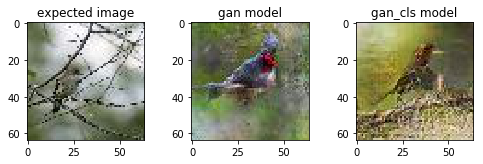

caption: this bird has a large head and a small body and has a grey and black wingspan and tail.


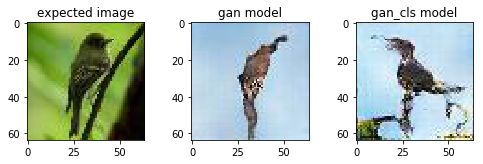

caption: a small bird that is predominantly grey in color except for its white wingbras, and its white belly 


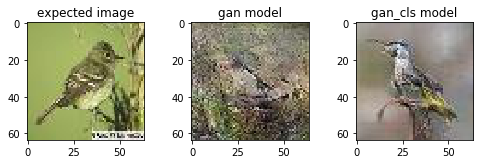

caption: this small bird has a grey bill and crown and grey wings with white wingbars.


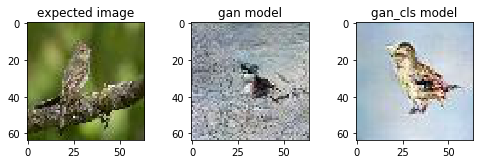

In [37]:
import matplotlib.pyplot as plt
for i in range(4):
    
#    name = birds_samples[i]['txt'].replace("/", "").replace("\n", "").replace(" ", "_")[:100]
    name = birds_samples[i]
    im1 = plt.imread('results_demo/original_images/{0}.jpg'.format(name))
    im2 = plt.imread('results_demo/{0}/{1}.jpg'.format(models[2], name))
    im3 = plt.imread('results_demo/{0}/{1}.jpg'.format(models[3], name))

    print('caption:', birds_samples[i].replace('_',' ') )
    figure = plt.figure(figsize=(8,48))
    plt.subplot(131).set_title('expected image')
    plt.imshow(im1)
    plt.subplot(132).set_title('gan model')
    plt.imshow(im2)
    plt.subplot(133).set_title('gan_cls model')
    plt.imshow(im3)
    plt.subplots_adjust(wspace=0.4)
    plt.show()